# Plot Gene Set Overlap
Use `micromamba activate benchmark_env`.

Rows: 2935 Columns: 8
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): database, descr
dbl (6): ngene, nai, ninter, iou, p_val, p_val_adj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Saving 7 x 7 in image


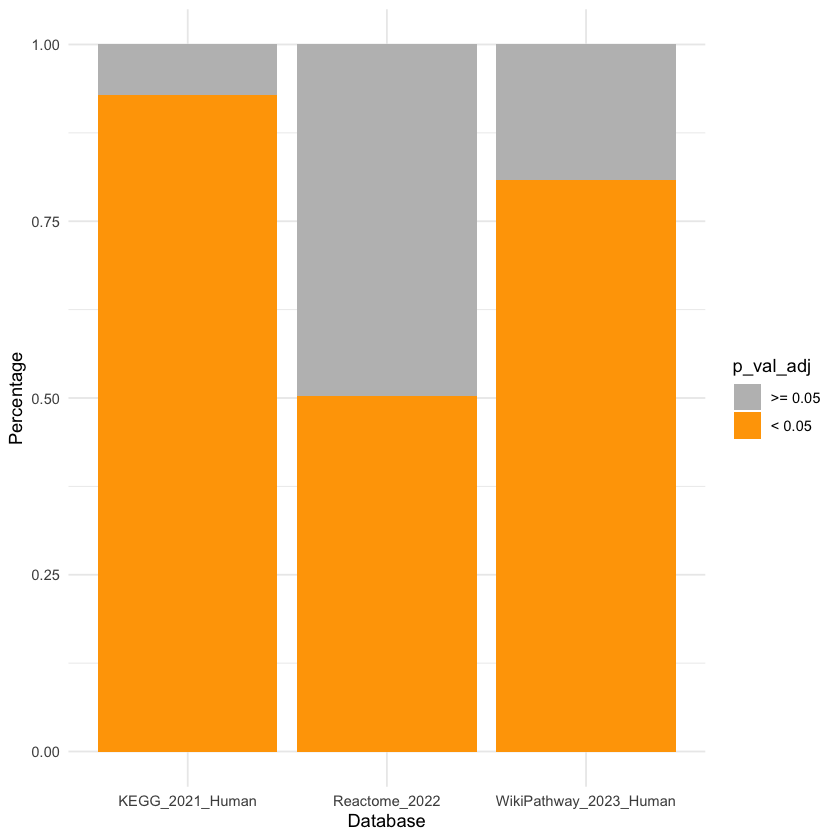

In [2]:
# Load necessary libraries
library(dplyr)
library(tidyr)
library(ggplot2)

df <- readr::read_tsv("genes_overlap.tsv")

# Group by 'database' and calculate the fraction of p_val_adj < 0.05
df_summary <- df %>%
  group_by(database) %>%
  summarise(
    total = n(),
    less_than_0_05 = sum(p_val_adj < 0.05),
    greater_or_equal_0_05 = total - less_than_0_05
  ) %>%
  mutate(
    percent_less_than_0_05 = less_than_0_05 / total,
    percent_greater_or_equal_0_05 = greater_or_equal_0_05 / total
  ) %>%
  pivot_longer(cols = starts_with("percent"), names_to = "threshold", values_to = "percent") %>%
  mutate(threshold = factor(threshold, levels = c("percent_greater_or_equal_0_05", "percent_less_than_0_05")))

# Plot the stacked bar plot
fig <- ggplot(df_summary, aes(x = database, y = percent, fill = threshold)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("percent_greater_or_equal_0_05" = "gray", "percent_less_than_0_05" = "orange"),
                    labels = c(">= 0.05", "< 0.05")) +
  labs(x = "Database", y = "Percentage", fill = "p_val_adj") +
  theme_minimal()

ggsave(fig, file="gpt-4o.pdf")
fig